# random forest classifier - flower iris

In [1]:
# imports for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load the dataset
from sklearn.datasets import load_iris
iris_data= load_iris()
df= pd.DataFrame(iris_data.data,columns= iris_data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df.rename(columns= {"sepal length (cm)":"sepal_length",	
                    "sepal width (cm)":"sepal_width",	
                    "petal length (cm)":"petal_length",
                    "petal width (cm)":"petal_width"},inplace= True)

In [6]:
df["species"]= iris_data.target

In [10]:
for columns in df.columns:
    print(f"{columns}:{df[columns].nunique()}")

sepal_length:35
sepal_width:23
petal_length:43
petal_width:22
species:3


In [11]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species           int32
dtype: object

<Axes: xlabel='species', ylabel='count'>

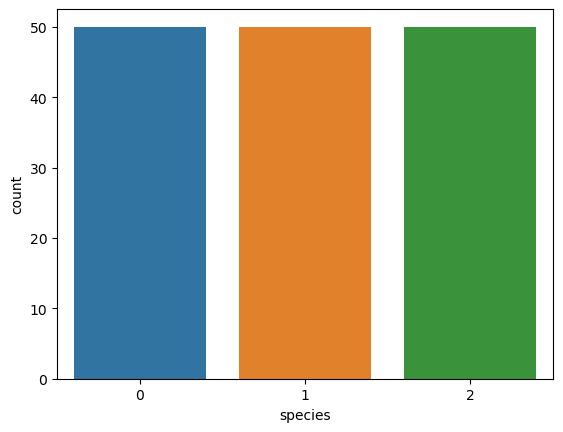

In [17]:
sns.countplot(data= df,x= "species")

C:\Users\WINDOWS 11-23H2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\WINDOWS 11-23H2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\WINDOWS 11-23H2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\WINDOWS 11-23H2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

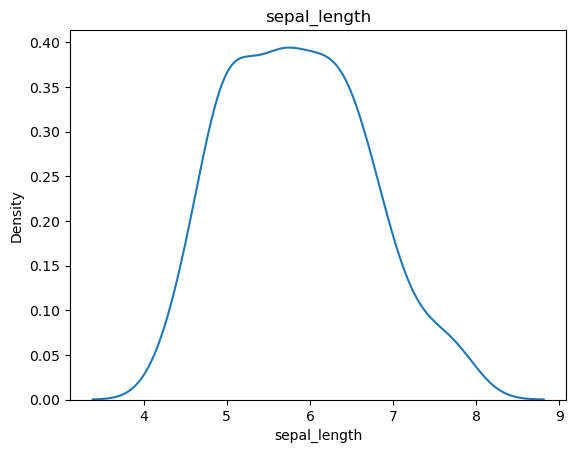

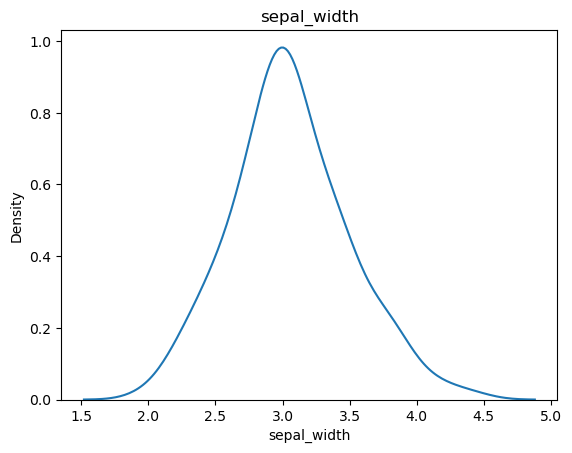

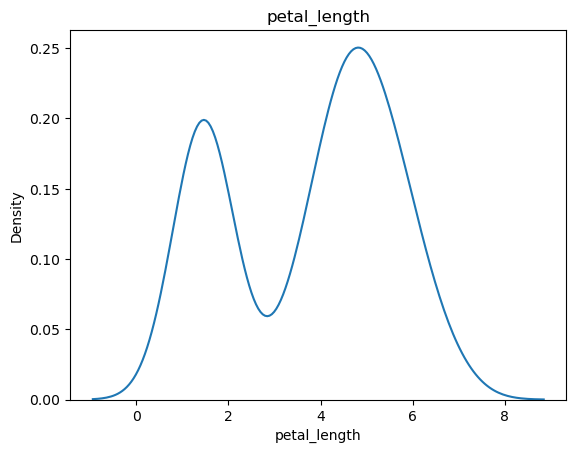

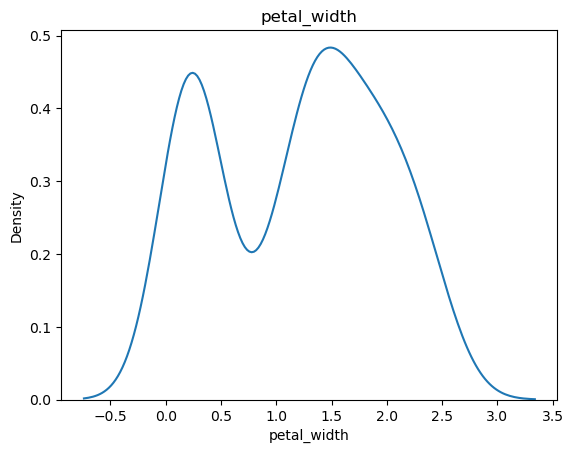

In [14]:
features= ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for cols in features:
    plt.figure()
    sns.kdeplot(data= df,x= cols)
    plt.title(cols)

In [18]:
# divide the data into features and labels
X= df.drop("species",axis= 1)
y= df.species

In [20]:
# train_test_split 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size= 0.2)

In [22]:
# prepare a random forest classifier
from sklearn.ensemble import RandomForestClassifier as RFC
random_forest_model= RFC(n_jobs= 2,criterion= "entropy",max_depth= 4)

In [23]:
random_forest_model.fit(X_train,y_train)
predictions= random_forest_model.predict(X_test)

In [24]:
random_forest_model.predict_proba(X_test)

array([[1.        , 0.        , 0.        ],
       [0.        , 0.43253426, 0.56746574],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.03142368, 0.96857632],
       [0.01      , 0.91228681, 0.07771319],
       [0.        , 0.01481862, 0.98518138],
       [0.        , 0.99029183, 0.00970817],
       [0.        , 0.        , 1.        ],
       [0.98      , 0.02      , 0.        ],
       [0.93      , 0.07      , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.97011729, 0.02988271],
       [0.        , 0.97470588, 0.02529412],
       [0.        , 0.00603187, 0.99396813],
       [0.        , 0.00603187, 0.99396813],
       [0.        , 0.00842949, 0.99157051],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.43344114, 0.56655886],
       [1.        , 0.        , 0.        ],
       [0.        , 0.96889507, 0.03110493],
       [0.

In [25]:
# get confusion matrix and classification report
from sklearn.metrics import classification_report,confusion_matrix

In [26]:
confusion_matrix(y_test,predictions)

array([[11,  0,  0],
       [ 0,  7,  2],
       [ 0,  0, 10]], dtype=int64)

In [28]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.78      0.88         9
           2       0.83      1.00      0.91        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30

